## Подготовительная работа

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('data/coil_stat.xlsx')
rows = sorted([f'V{n}{d:02d}' for d in range(2, 12) for n in range(1, 12)])
# rows += 
rects = df.loc[(df['file'].isin(rows))]

%matplotlib inline

In [2]:
def plot_step_stat(dframe, step, wire, ax=None, color=''):
    res = dframe.loc[(dframe['step (mm)'] == step) & (dframe['wire_dia (mm)'] == wire)][['file', 'wire_len (cm)', 'coil_n', 'L, uH']]
    res = res.sort_values(['coil_n'], ascending=[1])
    ax = res.plot(x='coil_n', y='L, uH', title=f'проводник={wire} мм', ax=ax, color=color, label=f'{step} мм')
    ax1 = ax.twiny()
    res.plot(x='wire_len (cm)', y='L, uH', ax=ax1, color=color)
    ax.grid(linestyle='--')
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 25)
    ax1.set_xlim(0, 295)
    ax1.set_ylim(0, 25)
    ax1.set_xlabel('Длина проводника, см')
    ax1.lines = list()
    ax1.get_legend().remove()
    ax.set_ylabel('Индуктивность, мкГн')
    ax.set_xlabel('Кол-во витков')
    return ax, res

def plot_coil_n_stat(dframe, coil_n, wire, ax=None, color=''):
    res = dframe.loc[(dframe['coil_n'] == coil_n) & (dframe['wire_dia (mm)'] == wire)][['file', 'step (mm)', 'L, uH']]
    res = res.sort_values(['step (mm)'], ascending=[1])
    ax = res.plot(x='step (mm)', y='L, uH', title=f'проводник={wire} мм', ax=ax, color=color, label=f'{coil_n} шт')
    ax.grid(linestyle='--')
    ax.set_xlim(0, 1.1)
    ax.set_ylim(0, 25)
    ax.set_ylabel('Индуктивность, мкГн')
    ax.set_xlabel('Шаг, мм')
    return ax, res

In [3]:
rects008 = rects.loc[rects['wire_dia (mm)'] == 0.08]
# rects008.to_excel('rects008.xlsx')

In [4]:
rects01 = rects.loc[rects['wire_dia (mm)'] == 0.1]
# rects01.to_excel('rects01.xlsx')

In [5]:
rects_teeth = df.loc[df['file'].str.match('VEXPN2')]
# rects_teeth.to_excel('vexpn2xx.xlsx')
rects_teeth008 = rects_teeth.loc[rects_teeth['wire_dia (mm)'] == 0.08]
rects_teeth01 = rects_teeth.loc[rects_teeth['wire_dia (mm)'] == 0.1]

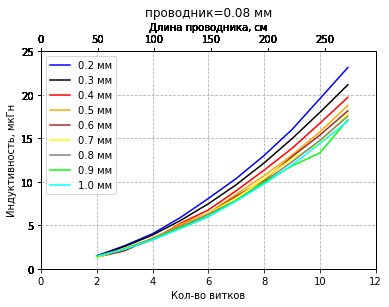

In [6]:
ax_coil_n_008, _ = plot_step_stat(rects, step=0.2, wire=0.08, color='blue')
for st, col in zip([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['black', 'red', 'orange', 'brown', 'yellow', 'grey', 'lime', 'cyan']):
    plot_step_stat(rects, step=st, wire=0.08, color=col, ax=ax_coil_n_008)

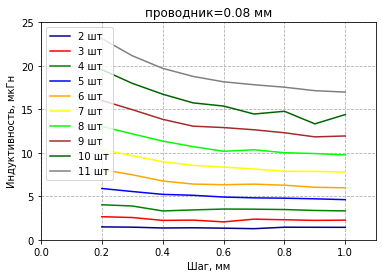

In [7]:
ax_step_008, res = plot_coil_n_stat(rects, coil_n=2, wire=0.08, color='darkblue')
for st, col in zip(range(3, 12), ['red', 'green', 'blue', 'orange', 'yellow', 'lime', 'brown', 'darkgreen', 'grey']):
    plot_coil_n_stat(rects, coil_n=st, wire=0.08, ax=ax_step_008, color=col)

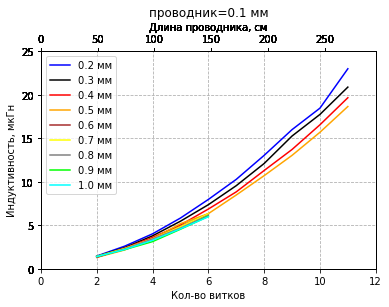

In [8]:
ax_coil_n_01, _ = plot_step_stat(rects, step=0.2, wire=0.1, color='blue')
for st, col in zip([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['black', 'red', 'orange', 'brown', 'yellow', 'grey', 'lime', 'cyan']):
    plot_step_stat(rects, step=st, wire=0.1, color=col, ax=ax_coil_n_01)

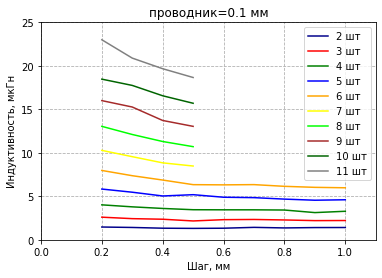

In [9]:
ax_step_01, res = plot_coil_n_stat(rects, coil_n=2, wire=0.1, color='darkblue')
for st, col in zip(range(3, 12), ['red', 'green', 'blue', 'orange', 'yellow', 'lime', 'brown', 'darkgreen', 'grey']):
    plot_coil_n_stat(rects, coil_n=st, wire=0.1, color=col, ax=ax_step_01)

In [10]:
rects_teeth008['teeth_n'] = rects_teeth008['mod'].apply(lambda v: int(v.strip('?')[-1]))
rects_teeth008 = rects_teeth008.sort_values(['teeth_n'], ascending=[1])
rects_teeth008

d:\work\python\coil-report\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,file,wire_len (cm),wire_dia (mm),step (mm),coil_n,width (mm),height (mm),"L, uH",freq,q,mod,teeth_n
256,VEXPN2_1,107.248,0.08,0.3,4.0,79.0,45.0,4.104,19780.0,61.0,rect-teeth-1,1
258,VEXPN2_2,109.237,0.08,0.3,4.0,79.0,45.0,4.046,19630.0,61.0,rect-teeth-2,2
261,VEXPN2_3,111.225,0.08,0.3,4.0,79.0,45.0,4.083,19570.0,58.0,rect-teeth-3,3
263,VEXPN2_4,113.213,0.08,0.3,4.0,79.0,45.0,4.042,19580.0,58.0,rect-teeth-4,4
265,VEXPN2_5,115.202,0.08,0.3,4.0,79.0,45.0,4.106,19590.0,57.0,rect-teeth-5,5
267,VEXPN2_6,117.190,0.08,0.3,4.0,79.0,45.0,4.085,19530.0,57.0,rect-teeth-6,6
269,VEXPN2_7,119.178,0.08,0.3,4.0,79.0,45.0,4.122,19570.0,55.0,rect-teeth-7,7
254,VEXPN2,121.041,0.08,0.3,4.0,79.0,45.0,3.538,19600.0,56.0,rect-teeth-8?,8


In [11]:
rects_teeth01['teeth_n'] = rects_teeth01['mod'].apply(lambda v: int(v.strip('?')[-1]))
rects_teeth01 = rects_teeth01.sort_values(['teeth_n'], ascending=[1])
rects_teeth01

d:\work\python\coil-report\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,file,wire_len (cm),wire_dia (mm),step (mm),coil_n,width (mm),height (mm),"L, uH",freq,q,mod,teeth_n
257,VEXPN2_1,107.248,0.1,0.3,4.0,79.0,45.0,4.065,19750.0,69.0,rect-teeth-1,1
259,VEXPN2_2,109.237,0.1,0.3,4.0,79.0,45.0,3.360,19720.0,64.0,rect-teeth-2,2
262,VEXPN2_3,111.225,0.1,0.3,4.0,79.0,45.0,4.071,19730.0,66.0,rect-teeth-3,3
264,VEXPN2_4,113.213,0.1,0.3,4.0,79.0,45.0,3.982,19790.0,67.0,rect-teeth-4,4
266,VEXPN2_5,115.202,0.1,0.3,4.0,79.0,45.0,4.116,19700.0,65.0,rect-teeth-5,5
268,VEXPN2_6,117.190,0.1,0.3,4.0,79.0,45.0,3.932,19670.0,63.0,rect-teeth-6,6
270,VEXPN2_7,119.178,0.1,0.3,4.0,79.0,45.0,4.061,19690.0,64.0,rect-teeth-7,7
255,VEXPN2,121.041,0.1,0.3,4.0,79.0,45.0,3.911,19670.0,63.0,rect-teeth-8?,8


## 0.3 мм шаг, 4 витка, провод 0.08 мм, узкие прямоугольные зубцы, 1-8 шт:

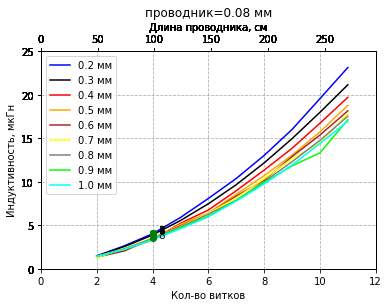

In [12]:
teeths_008 = list(rects_teeth008['teeth_n'])
ls_008 = list(rects_teeth008['L, uH'])

for t, l in zip(teeths_008, ls_008):
    ax_coil_n_008.plot(4, l, 'go')
    ax_coil_n_008.text(4, l, f'  {t}')

# ax.set_xlim(3.75, 4.25)
# ax.set_ylim(4, 4.15)
ax_coil_n_008.figure

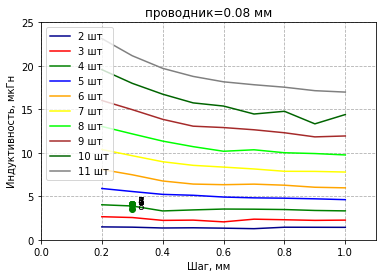

In [13]:
for t, l in zip(teeths_008, ls_008):
    ax_step_008.plot(0.3, l, 'go')
    ax_step_008.text(0.3, l, f'  {t}')

ax_step_008.figure

## 0.3 мм шаг, 4 витка, провод 0.1 мм, узкие прямоугольные зубцы, 1-8 шт:

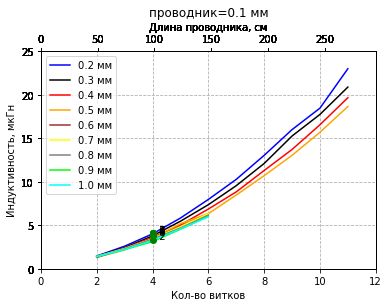

In [14]:
teeths_01 = list(rects_teeth01['teeth_n'])
ls_01 = list(rects_teeth01['L, uH'])

for t, l in zip(teeths_01, ls_01):
    ax_coil_n_01.plot(4, l, 'go')
    ax_coil_n_01.text(4, l, f'  {t}')

# ax.set_xlim(3.75, 4.25)
# ax.set_ylim(4, 4.15)
ax_coil_n_01.figure

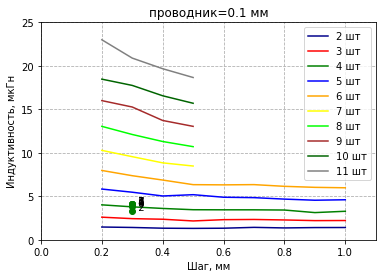

In [15]:
for t, l in zip(teeths_01, ls_01):
    ax_step_01.plot(0.3, l, 'go')
    ax_step_01.text(0.3, l, f'  {t}')

ax_step_01.figure